# Film Characteristics Analysis
In this project I aim to clean and manipulate the metadata of "The Movies Dataset" from Kaggle to conduct exploratory and visual analysis of common characteristics found in top and bottom movies in terms of revenue success. Mainly segmented into two different groups--top 20% and bottom 20% in terms of revenue--I aim to explore what are the similarities and differences when it comes down to how variables like production language, genre, production company, and budget relate to the movie's revenue success. 

It is my hope that in a hypothetical scenario, a film production company can gain some interesting insights into characteristics of movies that produced high revenue through this analysis.

You can find "The Movies Dataset" by Rounak Banik on Kaggle here: [Link](https://www.kaggle.com/rounakbanik/the-movies-dataset?select=movies_metadata.csv)

In [31]:
import pandas as pd
import numpy as np

# import movies_metadata.csv file using panda
movies_metadata = pd.read_csv("~/Desktop/DS Project/DS Movie Files/movies_metadata.csv", dtype="unicode")

# set desired width when printing the first few rows of the data, so that we can have a better grasp of the dataset
pd.set_option('display.width', 300)
np.set_printoptions(linewidth=300)
pd.set_option('display.max_columns',30)

In [32]:
# drop columns with ambiguous values or link references that cannot be analyzed right now
movies_metadata.drop(columns=['adult','belongs_to_collection','homepage','poster_path','tagline','video'],inplace=True)
print("\nThe columns of this data set: ", movies_metadata.columns)
print("The dimensions of the dataframe: ", movies_metadata.shape)
print("\n")
movies_metadata.head()


The columns of this data set:  Index(['budget', 'genres', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'title', 'vote_average', 'vote_count'], dtype='object')
The dimensions of the dataframe:  (45466, 18)




,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",10/30/95,373554033,81,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",8844,tt0113497,en,Jumanji,"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.",17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'name': 'Teitler Film', 'id': 2550}, {'name': 'Interscope Communications', 'id': 10201}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",12/15/95,262797249,104,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]",Released,Jumanji,6.9,2413
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",15602,tt0113228,en,Grumpier Old Men,"A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in cooking up a hot time with Max.",11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name': 'Lancaster Gate', 'id': 19464}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",12/22/95,0,101,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the women are holding their breath, waiting for the elusive ""good man"" to break a string of less-than-stellar lovers. Friends and confidants Vannah, Bernie, Glo and Robin talk it all out, determined to find a better way to breathe.",3.859495,"[{'name': 'Twentieth Century Fox Film Corporation', 'id': 306}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",12/22/95,81452156,127,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,"Just when George Banks has recovered from his daughter's wedding, he receives the news that she's pregnant ... and that George's wife, Nina, is expecting too. He was planning on selling their home, but that's a plan that -- like George -- will have to change with the arrival of both a grandchild and a kid of his own.",8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}, {'name': 'Touchstone Pictures', 'id': 9195}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",2/10/95,76578911,106,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,5.7,173


In [33]:
# exploring columns and their corresponding data types
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   budget                45466 non-null  object
 1   genres                45466 non-null  object
 2   id                    45466 non-null  object
 3   imdb_id               45449 non-null  object
 4   original_language     45455 non-null  object
 5   original_title        45466 non-null  object
 6   overview              44512 non-null  object
 7   popularity            45461 non-null  object
 8   production_companies  45463 non-null  object
 9   production_countries  45463 non-null  object
 10  release_date          45379 non-null  object
 11  revenue               45460 non-null  object
 12  runtime               45203 non-null  object
 13  spoken_languages      45460 non-null  object
 14  status                45379 non-null  object
 15  title                 45460 non-null

In [34]:
# convert budget, revenue, vote_average, vote_count columns to float type from object type
cols = ['budget', 'revenue', 'vote_average', 'vote_count']
for col in cols:
    movies_metadata[col] = pd.to_numeric(movies_metadata[col], errors='coerce')

Since this analysis will be based on exploring the relationship between quantitative and categorical variables, I will filter the dataset so that only non-zero values exist for quantitative columns like budget and revenue.

In [35]:
# filter out records that have 0 or NaN as values using Boolean conditionals, also filter out unreleased movies
filt = (movies_metadata['budget'] > 0) & (movies_metadata['revenue'] > 0) & (movies_metadata['vote_average'] > 0) \
        & (movies_metadata['vote_count'] > 0) & (movies_metadata['status'] == "Released")
movies_metadata = movies_metadata[filt]
movies_metadata.dropna(axis='index', how='any', subset=['budget','revenue','vote_average', 'vote_count'], inplace=True)
movies_metadata.drop(columns=['status', 'overview'], inplace=True)

In [36]:
# lets take a look at the data before continuing
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_colwidth', None)
movies_metadata.head()

,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",862,tt0114709,en,Toy Story,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",10/30/95,373554033.0,81,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",8844,tt0113497,en,Jumanji,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'name': 'Teitler Film', 'id': 2550}, {'name': 'Interscope Communications', 'id': 10201}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",12/15/95,262797249.0,104,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]",Jumanji,6.9,2413.0
3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]",31357,tt0114885,en,Waiting to Exhale,3.859495,"[{'name': 'Twentieth Century Fox Film Corporation', 'id': 306}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",12/22/95,81452156.0,127,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0
5,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}]",949,tt0113277,en,Heat,17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {'name': 'Forward Pass', 'id': 675}, {'name': 'Warner Bros.', 'id': 6194}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",12/15/95,187436818.0,170,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'es', 'name': 'Español'}]",Heat,7.7,1886.0
8,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 53, 'name': 'Thriller'}]",9091,tt0114576,en,Sudden Death,5.23158,"[{'name': 'Universal Pictures', 'id': 33}, {'name': 'Imperial Entertainment', 'id': 21437}, {'name': 'Signature Entertainment', 'id': 23770}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",12/22/95,64350171.0,106,"[{'iso_639_1': 'en', 'name': 'English'}]",Sudden Death,5.5,174.0


In [37]:
print(movies_metadata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5370 entries, 0 to 45422
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5370 non-null   float64
 1   genres                5370 non-null   object 
 2   id                    5370 non-null   object 
 3   imdb_id               5370 non-null   object 
 4   original_language     5370 non-null   object 
 5   original_title        5370 non-null   object 
 6   popularity            5370 non-null   object 
 7   production_companies  5370 non-null   object 
 8   production_countries  5370 non-null   object 
 9   release_date          5370 non-null   object 
 10  revenue               5370 non-null   float64
 11  runtime               5369 non-null   object 
 12  spoken_languages      5370 non-null   object 
 13  title                 5370 non-null   object 
 14  vote_average          5370 non-null   float64
 15  vote_count          

We can now see that quantitative variables like budget, revenue, vote_average, and vote_count have been converted to float datatypes and are ready for statistical analysis.

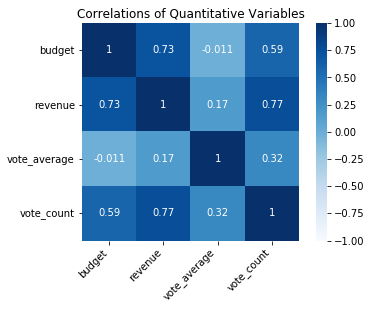

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# set up a correlation matrix heat map using Seaborn
corr = movies_metadata[cols].corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap="Blues",
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('Correlations of Quantitative Variables')
plt.show()

It seems like revenue has moderately strong positive correlations with budget and vote_count with correlation coefficients over 0.7. Budget and vote_count has a weaker positive correlation with 0.59.

I will start by segmenting the data into top 20% and bottom 20% of the total number of movies by revenue and provide details on common characteristics of the top and bottom movies.

In [39]:
eightieth = (np.percentile(movies_metadata['revenue'],80))
twentieth = (np.percentile(movies_metadata['revenue'],20))

print("The 80th percentile for movie revenues is (in USD):",eightieth)
print("The 20th percentile for movie revenues is (in USD):",twentieth)

import statistics
print("Mean of the revenues of movies is: ", statistics.mean(movies_metadata['revenue']))
print("Median of the revenues of movies is: ", statistics.median(movies_metadata['revenue']))

The 80th percentile for movie revenues is (in USD): 127433878.19999996
The 20th percentile for movie revenues is (in USD): 4407462.399999999
Mean of the revenues of movies is:  90494642.33817504
Median of the revenues of movies is:  30000000.0


We can see that by revenue, top 20% of the movies in the dataset are equal to or greater than around 127 million dollars, while bottom 20% are equal to or less than around 4.4 million dollars. However, seeing that the median is significantly lower than the mean of the revenues, the statistics suggest that the data is right skewed with top revenue outliers. We'll explore further down below.

In [56]:
top20_filt = movies_metadata['revenue']>=eightieth
bot20_filt = (movies_metadata['revenue']<=twentieth)

top20 = movies_metadata[top20_filt].copy()
bot20 = movies_metadata[bot20_filt].copy()

# To increase readibility when analyzing data, I will divide the revenue column and budget column 
# of each dataframe by 100k 
# $100,000 = 1
# $100,000,000 (100 million) = 1000
top20['revenue'] = top20['revenue'] / 100000
top20['budget'] = top20['budget'] / 100000
bot20['revenue'] = bot20['revenue'] / 100000
bot20['budget'] = bot20['budget'] / 100000

In [57]:
top20.sort_values(by=['revenue','budget'],ascending=False, inplace=True)
colTitles = ['title','revenue','budget','vote_average','vote_count','production_companies','original_language','spoken_languages','genres','release_date','runtime']
top20 = top20.reindex(columns=colTitles)
top20.head()

,title,revenue,budget,vote_average,vote_count,production_companies,original_language,spoken_languages,genres,release_date,runtime
14551,Avatar,27879.65087,2370.0,7.2,12114.0,"[{'name': 'Ingenious Film Partners', 'id': 289}, {'name': 'Twentieth Century Fox Film Corporation', 'id': 306}, {'name': 'Dune Entertainment', 'id': 444}, {'name': 'Lightstorm Entertainment', 'id': 574}]",en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'es', 'name': 'Español'}]","[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}]",12/10/09,162
26555,Star Wars: The Force Awakens,20682.23624,2450.0,7.5,7993.0,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Truenorth Productions', 'id': 1634}, {'name': 'Bad Robot', 'id': 11461}]",en,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 878, 'name': 'Science Fiction'}, {'id': 14, 'name': 'Fantasy'}]",12/15/15,136
1639,Titanic,18450.34188,2000.0,7.5,7770.0,"[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'Twentieth Century Fox Film Corporation', 'id': 306}, {'name': 'Lightstorm Entertainment', 'id': 574}]",en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}, {'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso_639_1': 'sv', 'name': 'svenska'}, {'iso_639_1': 'it', 'name': 'Italiano'}, {'iso_639_1': 'ru', 'name': 'Pусский'}]","[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}, {'id': 53, 'name': 'Thriller'}]",11/18/97,194
17818,The Avengers,15195.57910,2200.0,7.4,12000.0,"[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'Marvel Studios', 'id': 420}]",en,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 878, 'name': 'Science Fiction'}, {'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}]",4/25/12,143
25084,Jurassic World,15135.28810,1500.0,6.5,8842.0,"[{'name': 'Universal Studios', 'id': 13}, {'name': 'Amblin Entertainment', 'id': 56}, {'name': 'Legendary Pictures', 'id': 923}, {'name': 'Fuji Television Network', 'id': 3341}, {'name': 'Dentsu', 'id': 6452}]",en,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 878, 'name': 'Science Fiction'}, {'id': 53, 'name': 'Thriller'}]",6/9/15,124


In [58]:
top20.describe()

,revenue,budget,vote_average,vote_count
count,1074.000000,1074.000000,1074.000000,1074.000000
mean,3285.398453,801.835545,6.502700,2176.657356
std,2509.965741,573.594055,0.744137,1967.400578
min,1276.004350,0.150000,4.000000,2.000000
25%,1707.924985,370.000000,6.000000,844.000000
50%,2372.925115,685.000000,6.500000,1541.500000
75%,3735.535482,1100.000000,7.000000,2878.250000
max,27879.650870,3800.000000,8.500000,14075.000000


There are 1074 movies that are in the top 20%, the average revenue around 328 million dollars. Movie with the least amount of revenue being less than 127.6 million dollars and the highest revenue being 2.8 billion dollars. 

In [59]:
bot20.sort_values(by=['revenue','budget'],ascending=False, inplace=True)
colTitles = ['title','revenue','budget','vote_average','vote_count','production_companies','original_language','spoken_languages','genres','release_date','runtime']
bot20 = bot20.reindex(columns=colTitles)
bot20.head()

,title,revenue,budget,vote_average,vote_count,production_companies,original_language,spoken_languages,genres,release_date,runtime
34924,Katyar Kaljat Ghusali,44.00000,15.0,9.0,2.0,[],mr,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}, {'iso_639_1': 'mr', 'name': ''}]","[{'id': 10402, 'name': 'Music'}]",11/12/15,162
2378,Simply Irresistible,43.98989,60.0,5.5,52.0,"[{'name': 'New Regency Pictures', 'id': 10104}, {'name': 'Taurus Film', 'id': 20555}, {'name': 'Polar Entertainment Corporation', 'id': 62072}]",en,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'iso_639_1': 'en', 'name': 'English'}]","[{'id': 35, 'name': 'Comedy'}]",2/5/99,95
14569,Beyond a Reasonable Doubt,43.88563,250.0,5.5,79.0,"[{'name': 'Aramid Entertainment Fund', 'id': 3272}, {'name': 'Autonomous Films', 'id': 11647}, {'name': 'RKO Pictures', 'id': 20742}, {'name': 'Foresight Unlimited', 'id': 21897}, {'name': 'Signature Entertainment', 'id': 23770}, {'name': 'Government of Saudi Arabia', 'id': 61413}]",en,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 9648, 'name': 'Mystery'}]",2/5/09,105
10981,The Lost City,43.86236,96.0,5.9,25.0,"[{'name': 'Lions Gate Films', 'id': 35}]",en,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]",9/3/05,144
3717,Pumpkinhead,43.85516,35.0,5.9,108.0,"[{'name': 'De Laurentiis Entertainment Group (DEG)', 'id': 484}, {'name': 'Lion Films', 'id': 29393}]",en,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 14, 'name': 'Fantasy'}, {'id': 27, 'name': 'Horror'}]",6/9/88,86


In [60]:
bot20.describe()

,revenue,budget,vote_average,vote_count
count,1074.000000,1074.000000,1074.000000,1074.000000
mean,14.054179,62.022193,6.136685,121.081006
std,13.184721,82.349026,1.050067,221.491008
min,0.000010,0.000010,1.000000,1.000000
25%,2.053330,8.246935,5.600000,14.000000
50%,10.046995,33.739250,6.200000,46.000000
75%,23.562288,88.800000,6.800000,135.000000
max,44.000000,926.200000,9.000000,3574.000000


There are 1074 movies in the bottom 20%. Of the movies by revenue, the average revenue is around 1.4 million dollars, with the smallest revenue being 1 dollar and the largest revenue being 44 million dollars. Let's take a look at the movies with the lowest revenue and check if they are logical.

In [69]:
bot20.tail(20)

,title,revenue,budget,vote_average,vote_count,production_companies,original_language,spoken_languages,genres,release_date,runtime
2882,Dreaming of Joseph Lees,0.00007,20.00000,6.0,2.0,"[{'name': 'Fox Entertainment Group', 'id': 85721}]",en,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 10749, 'name': 'Romance'}, {'id': 18, 'name': 'Drama'}]",10/29/99,92
15917,Bran Nue Dae,0.00007,0.00007,5.2,6.0,[],en,[],"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10769, 'name': 'Foreign'}, {'id': 10749, 'name': 'Romance'}]",8/9/09,82
2663,Never Talk to Strangers,0.00006,64.00000,4.7,31.0,"[{'name': 'TriStar Pictures', 'id': 559}]",en,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 53, 'name': 'Thriller'}, {'id': 10749, 'name': 'Romance'}]",10/20/95,86
12946,To Rob a Thief,0.00006,40.02313,6.0,4.0,"[{'name': 'Narrow Bridge Films', 'id': 6535}]",en,"[{'iso_639_1': 'es', 'name': 'Español'}]","[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 35, 'name': 'Comedy'}, {'id': 10769, 'name': 'Foreign'}]",8/31/07,98
5101,Split Second,0.00005,0.00007,5.8,64.0,"[{'name': 'Entertainment', 'id': 7676}, {'name': 'Muse Productions', 'id': 15231}, {'name': 'Challenge Film Corporation', 'id': 75037}, {'name': 'XYZ Funding N.V.', 'id': 75038}]",en,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'name': 'Action'}, {'id': 27, 'name': 'Horror'}, {'id': 878, 'name': 'Science Fiction'}, {'id': 80, 'name': 'Crime'}]",5/1/92,90
274,Miami Rhapsody,0.00005,0.00006,5.6,7.0,"[{'name': 'Hollywood Pictures', 'id': 915}]",en,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]",1/27/95,95
922,East of Eden,0.00005,0.00001,7.5,163.0,"[{'name': 'Warner Bros.', 'id': 6194}]",en,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 18, 'name': 'Drama'}]",3/9/55,115
4937,American Adobo,0.00004,0.00344,5.3,3.0,"[{'name': 'ABS-CBN Film Productions', 'id': 4676}, {'name': 'Star Cinema Productions', 'id': 10417}, {'name': 'Unitel Classics', 'id': 10706}]",en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'tl', 'name': ''}]","[{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]",9/29/01,104
9589,Man Trouble,0.00004,0.00030,4.7,11.0,"[{'name': 'American Filmworks', 'id': 8310}, {'name': 'Cecchi Gori Pictures', 'id': 65393}, {'name': 'Penta Entertainment', 'id': 73866}, {'name': 'Budding Grove', 'id': 73867}]",en,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]",7/17/92,100
37250,Raja Natwarlal,0.00004,0.00005,5.5,8.0,"[{'name': 'UTV Motion Pictures', 'id': 2320}]",hi,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]","[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]",8/29/14,141


Right off the bat, we see the film "East of Eden" starring James Dean to have made 5 dollars worth of revenue according to the data. To filter out the outliers and reduce the probability of analyzing incorrect data, I will exclude movies in the bottom 20% that made less than $100,000.

In [71]:
bot20 = bot20[bot20['revenue'] >= 1]

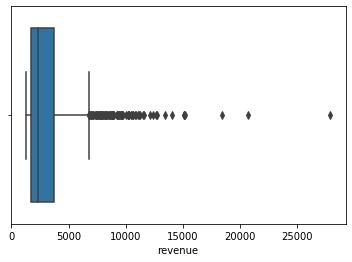

In [63]:
sns.boxplot(top20['revenue'])

Interpreting the boxplot, it seems like the majority of the top 20% of movie revenues lie between around 100 million dollars and around 400 million dollars--as noted by the interquartile range. Most outliers lie between around 700 million dollars in revenue up until even around 2.8 billion dollars in revenue.

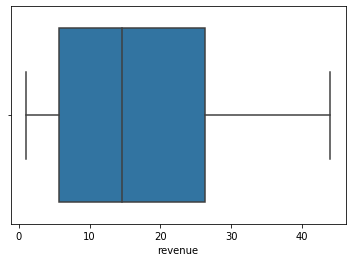

In [72]:
sns.boxplot(bot20['revenue'])

Now that we are done segmenting the movies_metadata dataframe into two different groups--top 20% and bottom 20% by revenues--and filtered down to the core quantitative and qualitative columns, the two datasets are ready to be analyzed by budget, genres, languages, and production companies to see how these variables are related to our dependent variable "revenue".

I'll first start by analyzing what are the most common languages in the whole dataset by building a frequency table.

In [94]:
lang_counts = pd.value_counts(movies_metadata.original_language).to_frame().reset_index()
lang_counts.columns = ['language','count']
lang_counts['percentage'] = lang_counts['count']/sum(lang_counts['count'])
lang_counts

,language,count,percentage
0,en,4789,0.891806
1,hi,99,0.018436
2,fr,89,0.016574
3,ru,69,0.012849
4,ja,39,0.007263
5,es,38,0.007076
6,it,31,0.005773
7,zh,29,0.005400
8,ta,26,0.004842
9,ko,25,0.004655


Calculating the percentages of the frequency of the languages, we see that nearly 90% of the movies out of around 45000 movies are made in English. To take a deeper look into the other languages that compose the remaining 10% of the movies, we'll create a bar chart and a pie chart of the top 10 languages excluding English to provide a more meaningful insight to the proportions of the languages.

In [107]:
other_langs = lang_counts[lang_counts['language'] != 'en'].copy()
other_langs.reset_index(inplace=True)
other_langs['percentage'] = other_langs['count'] / sum(other_langs['count'])
other_langs = other_langs.iloc[:10,:]
other_langs

,index,language,count,percentage
0,1,hi,99,0.170396
1,2,fr,89,0.153184
2,3,ru,69,0.118761
3,4,ja,39,0.067126
4,5,es,38,0.065404
5,6,it,31,0.053356
6,7,zh,29,0.049914
7,8,ta,26,0.044750
8,9,ko,25,0.043029
9,10,de,22,0.037866


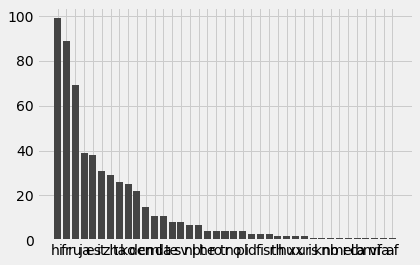

In [99]:
# Lets visualize the proportions that top 10 languages take with a bar chart
plt.style.use("fivethirtyeight")
lang_x = other_langs['language']
count_y = other_langs['count']
plt.bar(lang_x, count_y, color='#444444', label='All Languages')
plt.legend()
plt.title('')
plt.show()


That wasn't a very useful interpretation of the chart, maybe it will be more insightful if we exclude movies made in English. And since it is not easily interpretable which language the 2 letter abbreviation is, we can hard code values

In [ ]:
other_languages = top10_languages
del other_languages['en']
print(other_languages)
language_kv = {'hi':'Hindi', 'fr':'French', 'ru':'Russian', 'ja':'Japanese', 'es':'Spanish', 'zh':'Chinese',
               'it':'Italian', 'ta':'Tamil', 'ko':'Korean', 'de':'German'}

explode = [0.1,0.1,0,0,0,0,0,0,0,0]
plt.pie(other_languages.values(), labels=language_kv.values(), autopct='%1.1f%%', wedgeprops={'edgecolor':'black'},
        explode=explode)
plt.title("Top 10 Languages (Excluding English)")
plt.axis("equal")
plt.show()